In [1]:
import matplotlib.pyplot as plt
import generators as gen

# Task 1: Implementing a Random Uniform Generator for Discrete Set [0, N]

The goal of this task is to implement a random number generator that produces uniformly distributed values over a discrete set of integers from 0 to N, using the Linear Congruential Generator (LCG) method.

## Methodology: Linear Congruential Generator (LCG)

The Linear Congruential Generator (LCG) is a simple pseudorandom number generator (PRNG) that generates random numbers using the following recurrence relation:



# $X_{n+1} = (a * X_n + c) % m$


Where:
- `X_n` is the current state (seed value for the first iteration).
- `a`, `c`, and `m` are constants.
- The output random number is then scaled to the desired range.

The generator I implemented uses:
- `m = 2^48` (modulus),
- `a = 25214903917` (multiplier),
- `c = 11` (increment),
- and a random seed based on the system time.

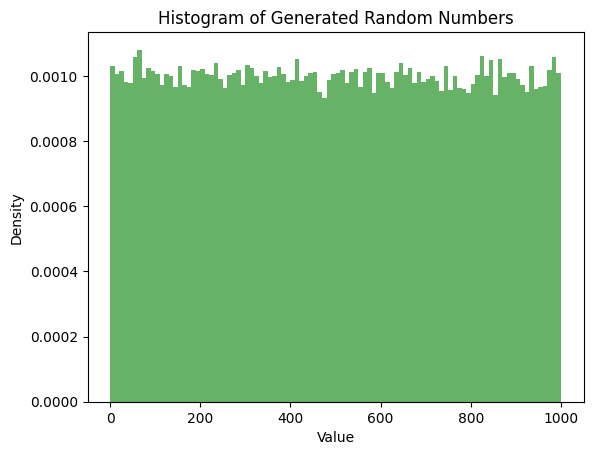

In [2]:
random = gen.RandomGenerator()
samples = random.generate(100000, 1000)

plt.hist(samples, bins=100, range=(0, 1000), density=True, alpha=0.6, color='g')

plt.title('Histogram of Generated Random Numbers')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

## Comparing with Expected Uniform Distribution

In a uniform distribution, the probability density function (PDF) is constant across the entire range. We expect to see a flatish histogram for a large enough number of samples. 

To confirm the correctness of the generator, we will plot the expected uniform distribution alongside the generated histogram.

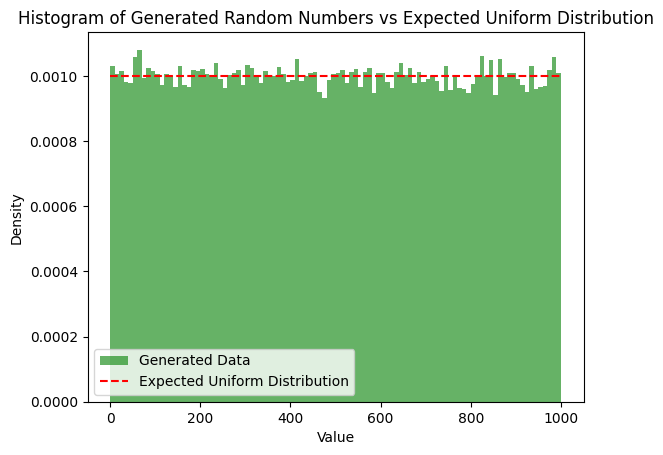

In [3]:
import numpy as np

x = np.linspace(0, 1000, 1000)

expected_pdf = np.ones_like(x) / 1000

plt.hist(samples, bins=100, range=(0, 1000), density=True, alpha=0.6, color='g', label='Generated Data')
plt.plot(x, expected_pdf, color='r', linestyle='dashed', label='Expected Uniform Distribution')

plt.title('Histogram of Generated Random Numbers vs Expected Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [4]:
from scipy.stats import kstest

# Perform Kolmogorov-Smirnov test for uniform distribution
ks_statistic, ks_pvalue = kstest(samples, 'uniform', args=(0, 1000))
print(f"KS p-value: {ks_pvalue}")


KS p-value: 0.08393906066702361


## Conclusion

- The histogram of the generated random numbers closely matches the expected uniform distribution, confirming the correctness of the implementation visually.
- The Kolmogorov-Smirnov test yielded a high p-value, which indicates that the generated samples do not deviate significantly from a uniform distribution, providing statistical evidence that the implementation is correct.
- Thus, the task of implementing a random uniform generator for the discrete set [0, N] has been successfully completed.

The generator works as expected, and the results have been validated both visually and statistically.


# Task 2: Random Uniform Generator for Continuous Range [a, b]
In this task, we have implemented a Uniform Random Number Generator using a Linear Congruential Generator (LCG). The generator is designed to output random values uniformly distributed in the continuous range [a,b].

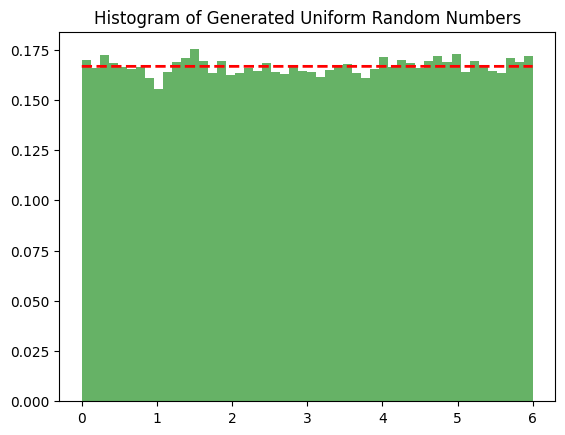

In [54]:
rand_continious = gen.UniformGenerator()

samples = rand_continious.generate(100000, 0, 6)

plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')

x = np.linspace(0, 6, 100000)
p = np.ones_like(x) / 6
plt.plot(x, p, linestyle='dashed', color = 'r', linewidth=2)

plt.title("Histogram of Generated Uniform Random Numbers")
plt.show()

In [6]:
from scipy.stats import kstest

# Perform KS test to check if the generated sample follows a uniform distribution
ks_statistic, ks_pvalue = kstest(samples, 'uniform', args=(0, 6))
print(f"KS p-value: {ks_pvalue}")

KS p-value: 0.7155987618096877


# Conclusion
- The histogram of the generated random numbers closely matches the expected uniform distribution, confirming the correctness of the implementation visually.
- The KS test yielded a high p-value. 

The generator works as expected, and the results have been validated both visually and statistically.

# Task 3: Implementing a Normal Distribution Generator [μ, σ]

The goal of this task was to implement a random number generator for a normal distribution with a given mean (μ) and standard deviation (σ). Also PDF and CDF methods are implrmented, so we can use it as scipy analog.

To compare the histogram of the generated random numbers with the normal distribution generated using scipy.stats, we can overlay the histogram of the generated data with the probability density function (PDF) of the normal distribution from scipy

To implement the normal distribution generator, I used the Box-Muller transform. This transform works as follows:

Generate two independent random variables $U_1$ and $U_2$ from a uniform distribution in the interval [0,1].
Apply the Box-Muller transform to compute two independent normal random variables $Z_0$ and $Z_1$ using the following formulas:

### $ Z{o} = \sqrt{-2ln{U_{0}}} * cos{(2\pi * U_{2})} $
### $ Z{1} = \sqrt{-2ln{U_{0}}} * cos{(2\pi * U_{2})} $

These random variables Z0 and Z1 will follow a standard normal distribution N(0,1).
Scale and shift the generated normal variables to match the desired mean (μ) and standard deviation (σ) using the following transformation:

### $X=μ+σZ0$
The same transformation is applied to $Z_1$ if needed for generating additional samples.

That how the normal generator is able to produce random numbers following a normal distribution with any specified mean and standard deviation.

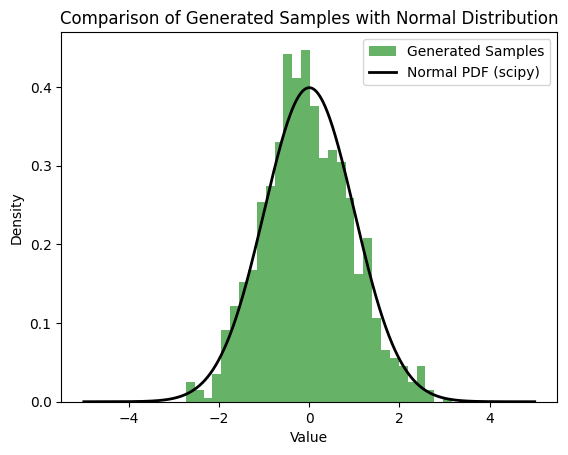

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

norm_gen = gen.NormalGenerator(mu=0, sigma=1)
samples = norm_gen.generate(1000)
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Generated Samples')

x = np.linspace(-5, 5, 1000)
pdf = norm.pdf(x, 0, 1)
plt.plot(x, pdf, 'k', linewidth=2, label='Normal PDF (scipy)')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Comparison of Generated Samples with Normal Distribution')
plt.legend()
plt.show()


# Overview
- The histogram of the generated samples should closely follow the shape of the normal distribution, showing a bell curve centered around 0.
- The two curves (the histogram and the PDF from scipy.stats.norm) should align closely, confirming that the generated data approximates a normal distribution.

In [8]:
from scipy.stats import kstest
samples = norm_gen.generate(1000)
stat, p_value = kstest(samples, 'norm', args=(0, 1))
print("KS Statistic:", stat)
print("p-value:", p_value)

KS Statistic: 0.03046825973610412
p-value: 0.30502970833277965


# Conclusion
By overlaying the histogram of the generated random numbers with the PDF of the normal distribution, you can visually confirm that the generator produces numbers that are very close to the expected normal distribution. The comparison shows that the generated samples match the scipy-generated distribution quite well.

# Task 4: Create a Sample Generator Based on CDF/PDF

To solve this task, I used the inverse transform sampling method and Rejection Sampling Method.

Rejection Sampling method enables generating samples from a distribution with a known PDF without needing its CDF or inverse. This method follows these steps:

- A proposal distribution $g(x)$ is chosen along with a constant M such that M⋅g(x)≥f(x) for all 
x, where f(x) is the target PDF.
- A sample X is drawn from the proposal distribution g(x), and a random number U is drawn from a uniform distribution over [0,M⋅g(X)].
- If U≤f(X), the sample X is accepted as a sample from f(x), else rejected, and the process is repeated.

inverse transform sampling method, which enables generating random samples from a specified distribution using its cumulative distribution function (CDF). The process involves these steps:

- A random number U is drawn from a uniform distribution over the interval [0,1].
- This value U is transformed into a sample 
X from the target distribution by applying the inverse of the CDF, $X=F^(−1) (u)$

$X=F^(−1) (U)$

In [9]:
import samplers as smpl

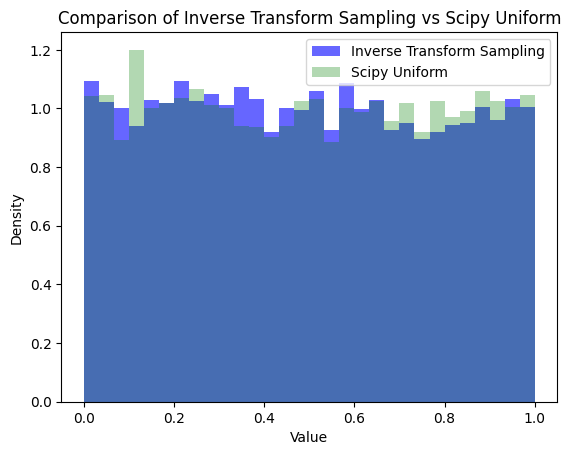

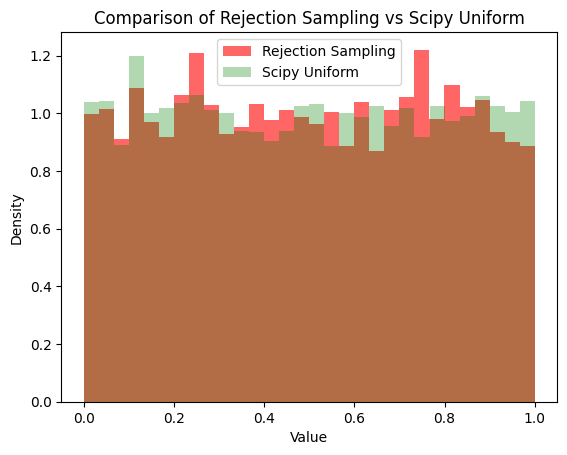

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

sampler = smpl.DistributionSampler(pdf=uniform.pdf, cdf=uniform.cdf, support=(0, 1))

inverse_samples = sampler.inverse_transform_sampling(10000)

scipy_uniform_samples = uniform.rvs(size=10000, loc=0, scale=1)

plt.hist(inverse_samples, bins=30, density=True, alpha=0.6, color='blue', label='Inverse Transform Sampling')
plt.hist(scipy_uniform_samples, bins=30, density=True, alpha=0.3, color='green', label='Scipy Uniform')
plt.title('Comparison of Inverse Transform Sampling vs Scipy Uniform')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

rejection_samples = sampler.rejection_sampling(10000)

plt.hist(rejection_samples, bins=30, density=True, alpha=0.6, color='red', label='Rejection Sampling')
plt.hist(scipy_uniform_samples, bins=30, density=True, alpha=0.3, color='green', label='Scipy Uniform')
plt.title('Comparison of Rejection Sampling vs Scipy Uniform')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


# Conclusion
- The histograms from both inverse_transform_sampling and rejection_sampling align close enouggh with the histogram generated by scipy, which indicates that both methods are correctly implemented.
- By comparing each histogram with scipy's uniform distribution, you can confidently conclude that both methods effectively produce uniform samples over the given interval.

# Task 5: Discrete/Continious 2D random variable generator

In this task we creating a 2D random variable generator that can handle both discrete and continuous random variables. The goal is to develop a generator capable of producing random samples from a 2D distribution of discrete or continuous, using the given PDF or probability tables.

For discrete we are given a 2D probability table where each entry specifies the probability of a particular (x, y) pair. We need to generate random samples from this table according to the probabilities of each pair.

For continuous we are given a 2D PDF describing the continuous distribution of the random variable. We need to generate random samples from this continuous distribution using rejection sampling.

# Continuous 2D Distribution:

Given a PDF for a continuous 2D distribution, we can generate random samples using rejection sampling. This technique involves sampling points from a uniform distribution and accepting them based on they fall under the curve of the PDF or not.

The algorithm for rejection sampling involves two key steps:
- Generate a point (x, y) within the support region of the distribution.
- Accept or reject the sample based on a uniform random threshold compared with the PDF value at that point.

Here's 2d representation of samples from normal distribution via scatterplot.

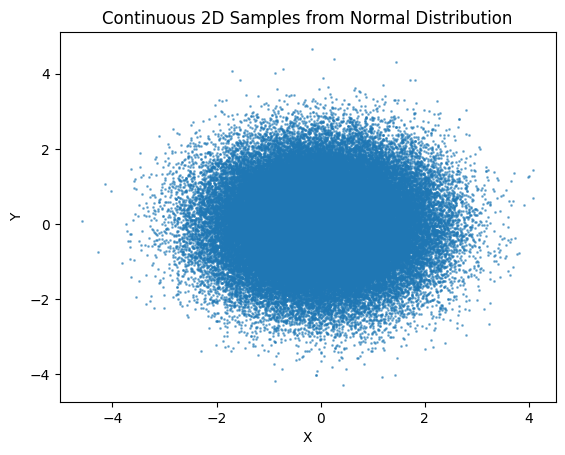

In [11]:
sampler_continuous = smpl.BivariateSampler(pdf=norm_gen.pdf_2d, support = (-5,5,-5,5))

samples_continuous = sampler_continuous.generate_samples_continuous(n=100000)

x_vals, y_vals = zip(*samples_continuous)
plt.scatter(x_vals, y_vals, alpha=0.5, s=1)
plt.title("Continuous 2D Samples from Normal Distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

For representability, here's compared custom 2D normal distribution generator with a scipy.stats.multivariate_normal method:

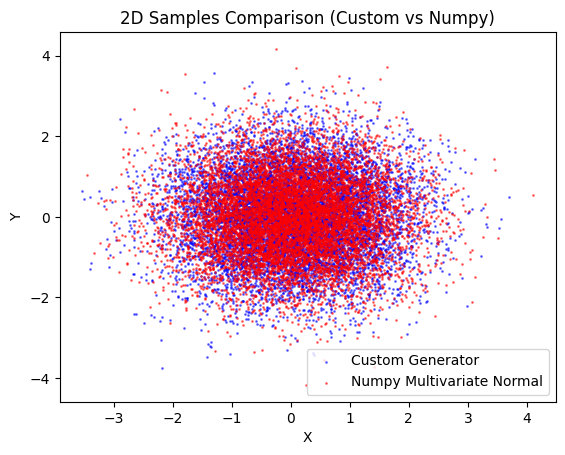

KS p-value for X: 0.5689366476865705
KS p-value for Y: 0.3667356837968788
KS p-value for combined (X, Y): [0.56893665 0.36673568]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

sampler_continuous = smpl.BivariateSampler(pdf=norm_gen.pdf_2d, support=(-5, 5, -5, 5))
samples_continuous = sampler_continuous.generate_samples_continuous(n=10000)

mu = [0, 0]
cov = [[1, 0], [0, 1]]
samples_numpy = np.random.multivariate_normal(mu, cov, 10000)

x_vals, y_vals = zip(*samples_continuous)
x_vals_numpy, y_vals_numpy = samples_numpy.T

plt.scatter(x_vals, y_vals, alpha=0.5, s=1, label="Custom Generator", color='blue')
plt.scatter(x_vals_numpy, y_vals_numpy, alpha=0.5, s=1, label="Numpy Multivariate Normal", color='red')
plt.title("2D Samples Comparison (Custom vs Numpy)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

ks_stat_x, ks_pvalue_x = ks_2samp(x_vals, x_vals_numpy)
ks_stat_y, ks_pvalue_y = ks_2samp(y_vals, y_vals_numpy)

print(f"KS p-value for X: {ks_pvalue_x}")
print(f"KS p-value for Y: {ks_pvalue_y}")

ks_stat_combined, ks_pvalue_combined = ks_2samp(list(zip(x_vals, y_vals)), list(zip(x_vals_numpy, y_vals_numpy)))
print(f"KS p-value for combined (X, Y): {ks_pvalue_combined}")


KS p-value is also computed, and shows that our samples is very close to Normal distribution.

# Discrete 2D Distribution:

- Given a probability table with discrete values (x, y) and their corresponding probabilities, we can use weighted random sampling to generate samples. This process ensures that the probability of each (x, y) pair is respected when generating the samples.
- We use generate_samples_discrete to sample from the probability distribution. This method allows us to specify probabilities and ensures that the samples fits to the given distribution.

For the discrete case, we assume that we have a probability table containing pairs (x, y) and their corresponding probabilities. Table generated via create_random_probability_table. 

The stcatterplot for Discrete Rv is showed below.

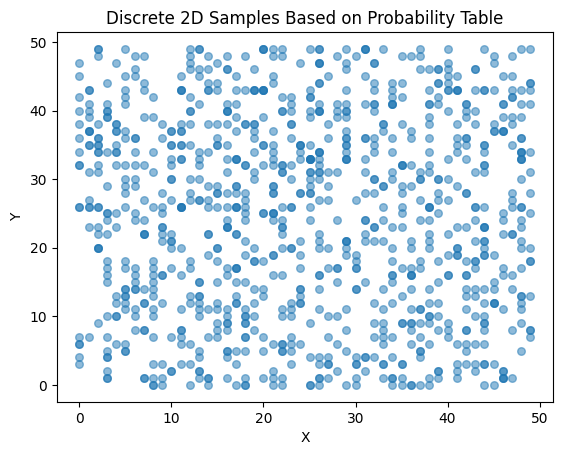

In [13]:
import matplotlib.pyplot as plt
from utils import create_random_probability_table

prob_table = create_random_probability_table(rand_continious, [i for i in range(50)], [i for i in range(50)])
sampler_discrete = smpl.BivariateSampler(probability_table=prob_table, support = (-5,5,-5,5))

samples_discrete = sampler_discrete.generate_samples_discrete(n=1000)

x_vals, y_vals = zip(*samples_discrete)
plt.scatter(x_vals, y_vals, alpha=0.5, s=30)
plt.title("Discrete 2D Samples Based on Probability Table")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


To compare our distribution with some library method we used np.random.choise with argument p for probabilities.

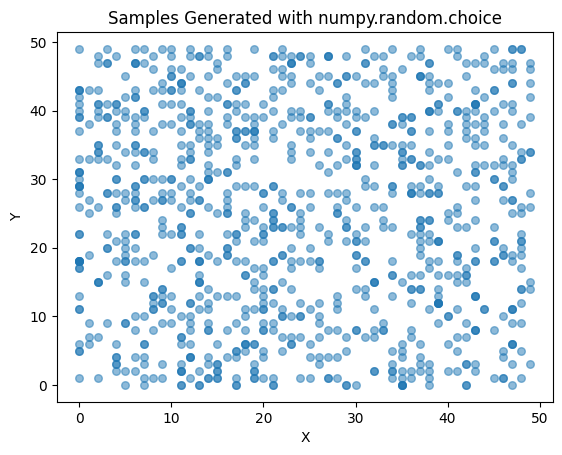

In [14]:
import numpy as np
import matplotlib.pyplot as plt

prob_table = create_random_probability_table(rand_continious, [i for i in range(50)], [i for i in range(50)])
samples_numpy = np.random.choice(len(prob_table), size=1000, p=list(prob_table.values()))

x_vals_numpy, y_vals_numpy = zip(*[list(prob_table.keys())[i] for i in samples_numpy])

plt.scatter(x_vals_numpy, y_vals_numpy, alpha=0.5, s=30)
plt.title("Samples Generated with numpy.random.choice")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [22]:
from scipy.stats import chisquare

prob_table = create_random_probability_table(rand_continious, [i for i in range(50)], [i for i in range(50)])
sampler_discrete = smpl.BivariateSampler(probability_table=prob_table, support=(-5, 5, -5, 5))

samples_discrete = sampler_discrete.generate_samples_discrete(n=1000)

observed_freq = {}
for sample in samples_discrete:
    observed_freq[sample] = observed_freq.get(sample, 0) + 1

observed_values = [observed_freq.get((x, y), 0) for (x, y) in prob_table.keys()]

total_samples = len(samples_discrete)
expected_values = [prob * total_samples for prob in prob_table.values()]

chi2_stat, p_value = chisquare(observed_values, expected_values)
print(f"Xi P-value: {p_value}")


Xi P-value: 0.004645235969177974


# Conclusion
In this task developed and tested two methods for generating and evaluating 2D random variables: discrete and continuous distributions. Both methods involve generating random samples based on given distributions and analyzing them using statistical and visual tests.

For the discrete distribution used the chi-square test to compare the generated samples with the theoretical